In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from complexPyTorch.complexLayers import ComplexBatchNorm2d, ComplexConv2d, ComplexLinear
from complexPyTorch.complexFunctions import complex_relu
from ComplexExponential import ComplexExponential


In [2]:
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.fc1 = ComplexLinear(1, 100)
        self.fc2 = ComplexLinear(100, 1)
        self.fc1.fc_i.weight.data = self.fc1.fc_i.weight.data*.1
        self.fc1.fc_r.weight.data = self.fc1.fc_r.weight.data*.1
        self.fc2.fc_i.weight.data = self.fc2.fc_i.weight.data*.1
        self.fc2.fc_r.weight.data = self.fc2.fc_r.weight.data*.1

             
    def forward(self,x):
        x = self.fc1(x)
        x = complex_relu(x)
        x = self.fc2(x)
        return x

In [3]:
def complex_mse_loss(output, target):
    return (0.5*(output - target)**2).mean(dtype=torch.complex64).abs()

In [4]:
def complex_loss(output, target):
    return ((output - target).abs()**2)

In [5]:
"""def lotka_volterra(t, z, alpha, beta, gamma, delta):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

alpha, beta, gamma, delta = 0.1, 0.02, 0.3, 0.01
initial_conditions = [10, 5]
t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 400)

solution = solve_ivp(lotka_volterra, t_span, initial_conditions, args=(alpha, beta, gamma, delta), t_eval=t_eval)
t = solution.t
prey, predator = solution.y
data_y = prey + 1j * predator
data_x = t + 1j * np.zeros_like(t)  # Add a zero imaginary part to the time variable

# Plot prey vs. predator
plt.figure(figsize=(8, 6))
plt.plot(prey, predator, label='Prey vs Predator')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Prey vs Predator in the Complex Plane')
plt.legend()
plt.grid(True)
plt.show()
"""

"def lotka_volterra(t, z, alpha, beta, gamma, delta):\n    x, y = z\n    dxdt = alpha * x - beta * x * y\n    dydt = delta * x * y - gamma * y\n    return [dxdt, dydt]\n\nalpha, beta, gamma, delta = 0.1, 0.02, 0.3, 0.01\ninitial_conditions = [10, 5]\nt_span = [0, 50]\nt_eval = np.linspace(t_span[0], t_span[1], 400)\n\nsolution = solve_ivp(lotka_volterra, t_span, initial_conditions, args=(alpha, beta, gamma, delta), t_eval=t_eval)\nt = solution.t\nprey, predator = solution.y\ndata_y = prey + 1j * predator\ndata_x = t + 1j * np.zeros_like(t)  # Add a zero imaginary part to the time variable\n\n# Plot prey vs. predator\nplt.figure(figsize=(8, 6))\nplt.plot(prey, predator, label='Prey vs Predator')\nplt.xlabel('Prey Population')\nplt.ylabel('Predator Population')\nplt.title('Prey vs Predator in the Complex Plane')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [6]:
# Data generation for training
data_x = np.linspace(0, 2 * np.pi, 100)
data_x = data_x + 1j * np.zeros_like(data_x)
data_y = np.exp((1j) * data_x)

In [7]:
# Convert the data to PyTorch tensors, ensuring complex data types
data_x_tensor = torch.tensor(data_x, dtype=torch.complex64)
data_y_tensor = torch.tensor(data_y, dtype=torch.complex64)

# Define dataset and data loader for mini-batch processing
dataset = torch.utils.data.TensorDataset(data_x_tensor, data_y_tensor)
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

# Example setup for model, loss function, and optimizer (assuming these are already defined)
model = ComplexNet().to('cpu')
criterion = complex_loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in loader:
        optimizer.zero_grad()        # Clear the gradients
        outputs = model(inputs)      # Forward pass
        loss = criterion(outputs, targets)  # Compute the loss
        loss.backward()              # Backpropagation
        optimizer.step()             # Update model parameters
    print(f'Epoch {epoch}: Loss = {loss.item()}')


Epoch 0: Loss = 0.017900971695780754
Epoch 1: Loss = 2.285118341445923
Epoch 2: Loss = 0.09377973526716232
Epoch 3: Loss = 0.17190317809581757
Epoch 4: Loss = 0.0820925161242485
Epoch 5: Loss = 0.28098317980766296
Epoch 6: Loss = 0.26974985003471375
Epoch 7: Loss = 0.10050508379936218
Epoch 8: Loss = 0.05101834610104561
Epoch 9: Loss = 0.09991602599620819
Epoch 10: Loss = 0.022638455033302307
Epoch 11: Loss = 0.2830180525779724
Epoch 12: Loss = 0.09991694986820221
Epoch 13: Loss = 0.09746771305799484
Epoch 14: Loss = 0.12802009284496307
Epoch 15: Loss = 0.030375374481081963
Epoch 16: Loss = 0.16964414715766907
Epoch 17: Loss = 0.16629791259765625
Epoch 18: Loss = 0.0067574139684438705
Epoch 19: Loss = 0.0033556048292666674
Epoch 20: Loss = 0.01192530244588852
Epoch 21: Loss = 0.07551442086696625
Epoch 22: Loss = 0.013688302598893642
Epoch 23: Loss = 0.01403030939400196
Epoch 24: Loss = 0.0004210105398669839
Epoch 25: Loss = 0.06099265068769455
Epoch 26: Loss = 0.03809249401092529
Epoch

In [8]:

"""# Assuming 'model' and 'data_x_tensor' are defined
with torch.no_grad():
    model.eval()
    outputs = []
    
    # Process each data point individually
    for i in range(data_x_tensor.size(0)):
        single_input = data_x_tensor[i].unsqueeze(0)  # Add batch dimension
        single_output = model(single_input)
        print(single_output)
        outputs.append(single_output)

    # Convert list of outputs to a single tensor
    outputs = torch.cat(outputs, dim=0)
    prey_pred = outputs.real.detach().numpy()
    predator_pred = outputs.imag.detach().numpy()

# Assuming 'prey' and 'predator' are the true values from the Lotka-Volterra model
plt.figure(figsize=(8, 6))
plt.plot(prey, predator, label='True Prey vs Predator')
plt.plot(prey_pred, predator_pred, label='Predicted Prey vs Predator')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('True vs Predicted Prey vs Predator in the Complex Plane')
plt.legend()
plt.grid(True)
plt.show()"""


"# Assuming 'model' and 'data_x_tensor' are defined\nwith torch.no_grad():\n    model.eval()\n    outputs = []\n    \n    # Process each data point individually\n    for i in range(data_x_tensor.size(0)):\n        single_input = data_x_tensor[i].unsqueeze(0)  # Add batch dimension\n        single_output = model(single_input)\n        print(single_output)\n        outputs.append(single_output)\n\n    # Convert list of outputs to a single tensor\n    outputs = torch.cat(outputs, dim=0)\n    prey_pred = outputs.real.detach().numpy()\n    predator_pred = outputs.imag.detach().numpy()\n\n# Assuming 'prey' and 'predator' are the true values from the Lotka-Volterra model\nplt.figure(figsize=(8, 6))\nplt.plot(prey, predator, label='True Prey vs Predator')\nplt.plot(prey_pred, predator_pred, label='Predicted Prey vs Predator')\nplt.xlabel('Prey Population')\nplt.ylabel('Predator Population')\nplt.title('True vs Predicted Prey vs Predator in the Complex Plane')\nplt.legend()\nplt.grid(True)\nplt

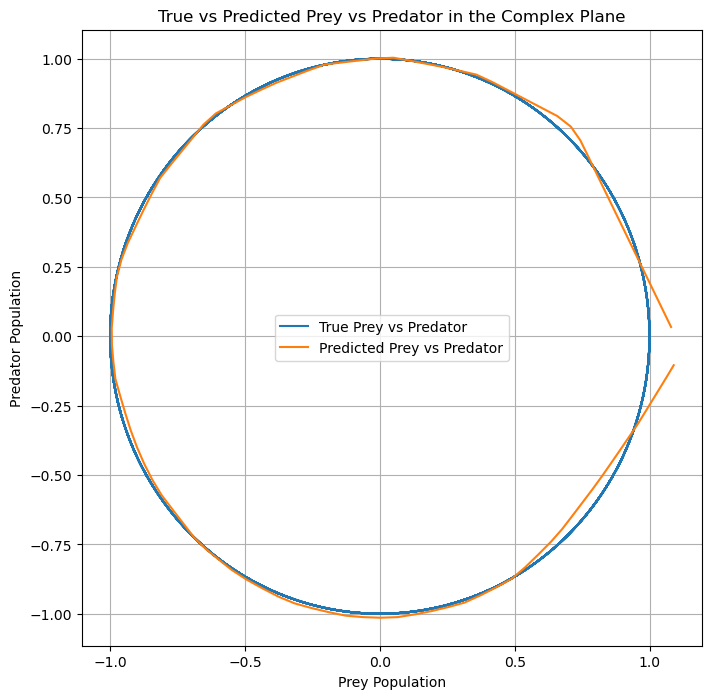

In [9]:
data_x = np.linspace(2, 20 * np.pi, 1000)
data_x = data_x + 1j * np.zeros_like(data_x)
data_y = np.exp((1j) * data_x)
# Assuming 'model' and 'data_x_tensor' are defined
with torch.no_grad():
    model.eval()
    outputs = []
    
    # Process each data point individually
    for i in range(data_x_tensor.size(0)):
        single_input = data_x_tensor[i].unsqueeze(0)  # Add batch dimension
        single_output = model(single_input)
        outputs.append(single_output)

    # Convert list of outputs to a single tensor
    outputs = torch.cat(outputs, dim=0)
    prey_pred = outputs.real.detach().numpy()
    predator_pred = outputs.imag.detach().numpy()

# Assuming 'prey' and 'predator' are the true values from the Lotka-Volterra model
plt.figure(figsize=(8, 8))
plt.plot(np.real(data_y),np.imag(data_y), label='True Prey vs Predator')
plt.plot(prey_pred, predator_pred, label='Predicted Prey vs Predator')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('True vs Predicted Prey vs Predator in the Complex Plane')
plt.legend()
plt.grid(True)
plt.show()
